<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_maio_2020/blob/master/ANN_segmentacao_sugar_OUR_CODE_v_08_maio_26_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
import random

import re
from sklearn.model_selection import train_test_split

In [0]:
!pip install mahotas

In [0]:
import mahotas.features.texture as mht
import mahotas.features

In [0]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020

import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [0]:
''''''
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='Fotos9Amostras720_e_varios_graos.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()


fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [0]:
Size=28 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

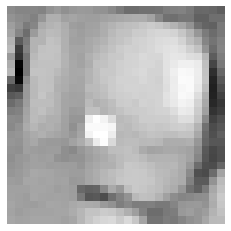

In [0]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)
plt.axis("off")
plt.imshow(ww[10], cmap = "gray")

In [0]:
y_valor=[]

Graos='G' # numero 1
Indef='I' # numero 2
Buraco='B' # numero 3
Varios='V' # numero 4

for x in img_name:
  if re.search(Graos, x):
    y_valor.append(1)
  elif re.search(Indef, x):
    y_valor.append(2)
  elif re.search(Buraco, x):
    y_valor.append(3)
  else:
    y_valor.append(4)
    
print(y_valor)
print(len(y_valor))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 

In [0]:
W_train, W_test, yw_train, yw_test = train_test_split(np.array(ww), np.array(y_valor), 
                                                    test_size=0.30, 
                                                    random_state=42)

In [0]:
train_images=W_train
train_labels=yw_train
test_images=W_test
test_labels=yw_test

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
20/20 [==============================] - 0s 2ms/step - loss: 90.9077 - accuracy: 0.4198
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 21.7099 - accuracy: 0.5592
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 13.6609 - accuracy: 0.6515
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 15.1440 - accuracy: 0.6126
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 9.7463 - accuracy: 0.6775
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 10.0063 - accuracy: 0.6613
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: 9.4317 - accuracy: 0.6904
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: 16.0974 - accuracy: 0.6402
Epoch 9/10
20/20 [==============================] - 0s 2ms/step - loss: 6.3714 - accuracy: 0.7423
Epoch 10/10
20/20 [==============================] - 0s 3ms/step - loss: 7.7232 - accuracy: 0.7212


In [0]:
Size=1200 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

In [0]:
# img = img_as_float(astronaut()[::2, ::2])

Transfere='Fotos_Grandes_3cdAmostra.zip'
#Nome='Q6-1-4.jpg'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()
#img=cv2.imread(Nome)

In [0]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)
img=ww[0]

In [0]:
print(img.shape)

(1200, 1200)


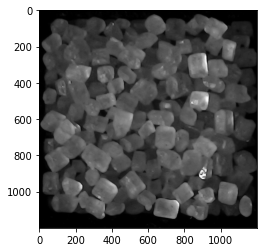

In [0]:
plt.imshow(img, cmap = "gray")

In [0]:
a=0
b=1200
c=50
d=300
Num=50
ww=[]
label=[]

for i in range(Num):
  x=random.randint(a, b)
  y=random.randint(a, b)

  Width=random.randint(c, d)
  img_1st=np.zeros((Width,Width)).astype(np.int64)

  for i in range(Width):
    for j in range(Width):

      size_x=Width+x
      size_y=Width+y
    
      if(size_x>=Size):
        x=Size-Width

      if(size_y>= Size):
        y=Size-Width

      img_1st[i,j]=np.copy(img[i+y,j+x])
  ww.append(img_1st)
  nome = "W=" + str(Width)+" x="+str(x)+" y="+str(y)
  label.append(nome)


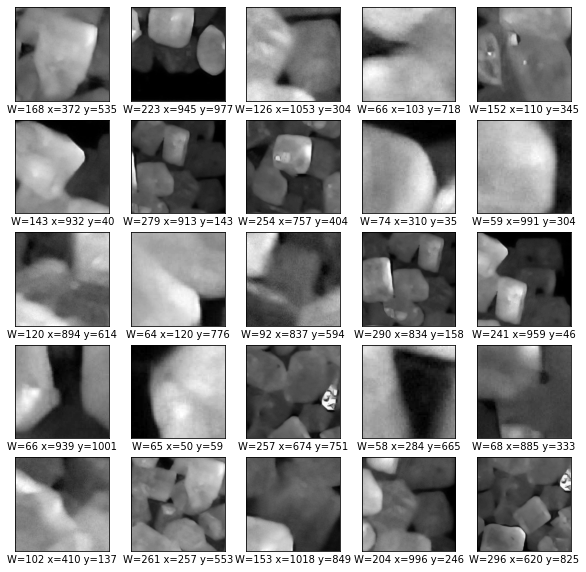

In [0]:
Num=25
plt.figure(figsize=(10,10))
for i in range(Num):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ww[i], cmap = "gray")
    plt.xlabel(label[i])
plt.show()


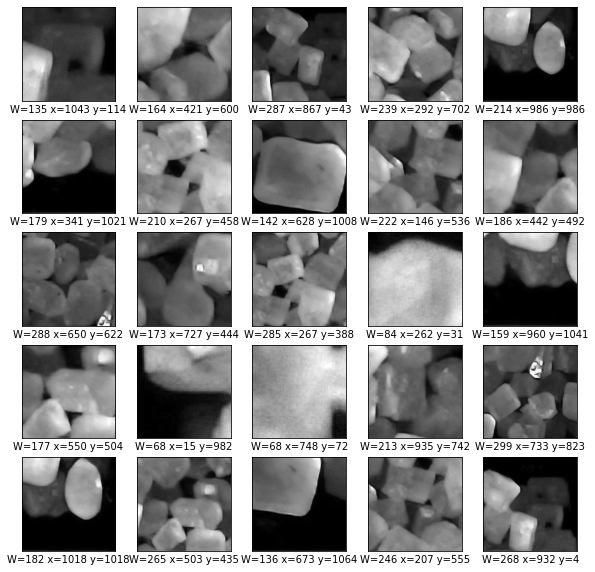

In [0]:
Num=25
plt.figure(figsize=(10,10))
for i in range(Num):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ww[i+25], cmap = "gray")
    plt.xlabel(label[i+25])
plt.show()

In [0]:
print(label)

['W=168 x=372 y=535', 'W=223 x=945 y=977', 'W=126 x=1053 y=304', 'W=66 x=103 y=718', 'W=152 x=110 y=345', 'W=143 x=932 y=40', 'W=279 x=913 y=143', 'W=254 x=757 y=404', 'W=74 x=310 y=35', 'W=59 x=991 y=304', 'W=120 x=894 y=614', 'W=64 x=120 y=776', 'W=92 x=837 y=594', 'W=290 x=834 y=158', 'W=241 x=959 y=46', 'W=66 x=939 y=1001', 'W=65 x=50 y=59', 'W=257 x=674 y=751', 'W=58 x=284 y=665', 'W=68 x=885 y=333', 'W=102 x=410 y=137', 'W=261 x=257 y=553', 'W=153 x=1018 y=849', 'W=204 x=996 y=246', 'W=296 x=620 y=825', 'W=135 x=1043 y=114', 'W=164 x=421 y=600', 'W=287 x=867 y=43', 'W=239 x=292 y=702', 'W=214 x=986 y=986', 'W=179 x=341 y=1021', 'W=210 x=267 y=458', 'W=142 x=628 y=1008', 'W=222 x=146 y=536', 'W=186 x=442 y=492', 'W=288 x=650 y=622', 'W=173 x=727 y=444', 'W=285 x=267 y=388', 'W=84 x=262 y=31', 'W=159 x=960 y=1041', 'W=177 x=550 y=504', 'W=68 x=15 y=982', 'W=68 x=748 y=72', 'W=213 x=935 y=742', 'W=299 x=733 y=823', 'W=182 x=1018 y=1018', 'W=265 x=503 y=435', 'W=136 x=673 y=1064', 'W

In [0]:
#img = ww[0].reshape((28,28))

In [0]:
print(np.array(ww[0]))

[[95 96 94 ... 47 44 46]
 [94 93 91 ... 46 44 46]
 [93 92 90 ... 46 45 48]
 ...
 [94 95 95 ... 84 83 83]
 [94 93 94 ... 85 84 85]
 [96 92 93 ... 83 83 84]]


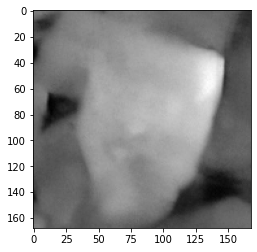

In [0]:
plt.imshow(ww[0], cmap = "gray")

In [0]:
'''
xw=[]
Size=28
for i in range(Num):
  xw.append(cv2.resize(np.array(ww[0]),(Size,Size)))
'''

'\nxw=[]\nSize=28\nfor i in range(Num):\n  xw.append(cv2.resize(np.array(ww[0]),(Size,Size)))\n'

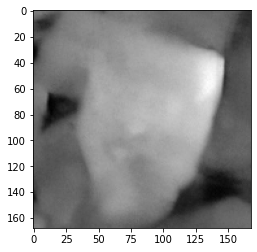

In [0]:
from PIL import Image
data=np.array(ww[0])
img = Image.fromarray(data.astype('uint8'), mode='L')
plt.imshow(img, cmap = "gray")
